# Figures for article

This notebook creates the figures in the Uncertainpy article.

In [1]:
import chaospy as cp
import uncertainpy as un
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from prettyplot import *

/home/simen/anaconda3/envs/uncertainpy/lib/python2.7/site-packages/h5py-2.7.1-py2.7-linux-x86_64.egg/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
figure_width = 7.08
labelsize = 10
titlesize = 12
fontsize = 8
ticklabelsize = 8
linewidth = 1.4
figsize = (figure_width, figure_width*0.4)

### Utility functions

In [3]:
def str_to_latex(text):
    if "_" in text:
        txt = text.split("_")
        return "$" + txt[0] + "_{\mathrm{" + "-".join(txt[1:]) + "}}$"
    else:
        return text

In [4]:
def list_to_latex(texts):
    tmp = []
    for txt in texts:
        tmp.append(str_to_latex(txt))

    return tmp

# Coffee cup

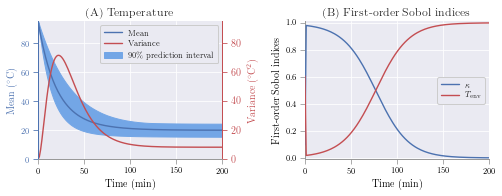

In [5]:
coffe_cup = un.Data("data/coffee_cup.h5")
time = coffe_cup["coffee_cup"].time
mean = coffe_cup["coffee_cup"].mean
variance = coffe_cup["coffee_cup"].variance
percentile_5 = coffe_cup["coffee_cup"].percentile_5
percentile_95 = coffe_cup["coffee_cup"].percentile_95
sensitivity = coffe_cup["coffee_cup"].sobol_first

labels = coffe_cup.get_labels("coffee_cup")
xlabel, ylabel = labels

set_latex_font()

set_style("seaborn-darkgrid")
plt.rcParams.update({"axes.titlepad": 6})

fig, axes = plt.subplots(ncols=2, figsize=figsize)


# Plotting mean and variance
title = r"(A) Temperature"

prettyPlot(time, mean,
           color=0,
           palette="deep",
           ax=axes[0],
           linewidth=linewidth)

colors = get_current_colormap()


ax2 = axes[0].twinx()
ax2.grid(False)

ax2.tick_params(axis="y", which="both", right="on", left="off", labelright="on",
                color=colors[2], labelcolor=colors[2], labelsize=labelsize)
ax2.set_ylabel(r"Variance ($^\circ\mathrm{C}^2$)", color=colors[2], fontsize=labelsize, labelpad=7)
ax2.spines["right"].set_visible(True)
ax2.spines["right"].set_edgecolor(colors[2])



ax2.set_ylim([0, max(percentile_95)])
axes[0].set_ylim([0, max(percentile_95)])

ax2.plot(time, variance, color=colors[2], linewidth=linewidth)
   
# Plotting prediction interval
axes[0].fill_between(time,
                     percentile_5,
                     percentile_95,
                     color=(0.45, 0.65, 0.9))


# Dummy plot to create a label
prettyPlot([-10], [10], color=2, ax=axes[0], palette="deep", linewidth=linewidth)
axes[0].legend(["Mean", "Variance", "90\% prediction interval"], fontsize=fontsize)

axes[0].tick_params(axis="y", color=colors[0], labelcolor=colors[0], labelsize=fontsize)
axes[0].tick_params(axis='x', labelsize=fontsize)
axes[0].set_ylabel("Mean ($^\circ\mathrm{C}$)", color=colors[0], fontsize=labelsize)
axes[0].set_xlabel(xlabel, fontsize=labelsize)
axes[0].set_title(title, fontsize=titlesize)
ax2.spines['left'].set_color(colors[0])



title = "(B) First-order Sobol indices"
prettyPlot(time, sensitivity[0],
           palette="deep",
           ax=axes[1],
           color=0,
           linewidth=linewidth)


prettyPlot(time, sensitivity[1],
           palette="deep",
           ax=axes[1],
           color=2,
           linewidth=linewidth)

axes[1].set_title(title, fontsize=titlesize)
axes[1].set_xlabel(xlabel, fontsize=labelsize)
axes[1].set_ylabel("First-order Sobol indices", fontsize=labelsize)

axes[1].set_ylim([-0.01, 1.01])

axes[1].tick_params(axis='both', labelsize=fontsize)

for ax in axes:
    ax.set_xlim([min(time), max(time)])

axes[1].legend([r"$\kappa$", r"$T_{\mathrm{env}}$"], loc=7, fontsize=fontsize)

plt.tight_layout()
plt.subplots_adjust(wspace=0.45)
plt.savefig("figures/coffee_cup.eps")
plt.show()

# Hodgkin-Huxley

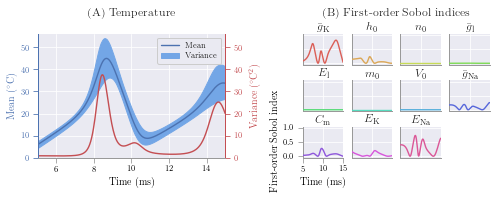

In [6]:
import matplotlib.gridspec as gridspec

hh = un.Data("data/valderrama.h5")
time = hh["valderrama"].time
sobol_first = hh["valderrama"].sobol_first
variance = hh["valderrama"].variance
mean = hh["valderrama"].mean
percentile_95 = hh["valderrama"].percentile_95
percentile_5 = hh["valderrama"].percentile_5

labels = hh.get_labels("valderrama")
xlabel, ylabel = labels

titlepad = 18

fig = plt.figure(figsize=figsize)
outer = gridspec.GridSpec(1, 2, wspace=0.4)

inner = gridspec.GridSpecFromSubplotSpec(1, 1,
                                         subplot_spec=outer[0])

set_latex_font()

plt.rcParams.update({"axes.titlepad": titlepad})
ax = plt.subplot(inner[0])

set_style("seaborn-darkgrid")
title = r"(A) Temperature"

prettyPlot(time, mean,
           color=0,
           palette="deep",
           ax=ax,
           linewidth=linewidth)

ax.set_xlabel(xlabel, fontsize=labelsize) 
ax.set_ylabel(ylabel, fontsize=labelsize)


colors = get_current_colormap()

ax2 = ax.twinx()
ax2.grid(False)

ax2.tick_params(axis="y", which="both", right="on", left="off", labelright="on",
                color=colors[2], labelcolor=colors[2], labelsize=fontsize)
ax2.set_ylabel(r"Variance ($^\circ\mathrm{C}^2$)", color=colors[2], fontsize=labelsize, labelpad=7)
ax2.spines["right"].set_visible(True)
ax2.spines["right"].set_edgecolor(colors[2])

ax2.set_ylim([0, max(percentile_95) + 2])
ax.set_ylim([0, max(percentile_95) + 2])

ax2.plot(time, variance, color=colors[2], linewidth=linewidth)
   
# Plotting prediction interval
ax.fill_between(time,
                percentile_5,
                percentile_95,
                color=(0.45, 0.65, 0.9))


# Dummy plot to create a label
prettyPlot([-10], [10], color=2, ax=axes[0], palette="deep", linewidth=linewidth)
ax.legend(["Mean", "Variance", "90\% prediction interval"], fontsize=fontsize)

ax.tick_params(axis="y", color=colors[0], labelcolor=colors[0], labelsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)
ax.set_ylabel("Mean ($^\circ\mathrm{C}$)", color=colors[0], fontsize=labelsize)
ax.set_xlabel(xlabel, fontsize=labelsize)
ax.set_title(title, fontsize=titlesize)

ax2.spines['left'].set_color(colors[0])

ax.set_xlim([min(time), max(time)])

ax.legend(["Mean", "Variance", "90\% prediction interval"], fontsize=fontsize)



nr_plots = len(hh.uncertain_parameters)
grid_size = np.ceil(np.sqrt(nr_plots))
grid_x_size = int(grid_size)
grid_y_size = int(np.ceil(nr_plots/float(grid_x_size)))

inner = gridspec.GridSpecFromSubplotSpec(grid_y_size, grid_x_size,
                                         subplot_spec=outer[1],
                                         hspace=0.5)

set_style("seaborn-white")
plt.rcParams.update({"axes.titlepad": titlepad})
ax = plt.subplot(outer[1], zorder=-10)

spines_color(ax, edges={"top": "None", "bottom": "None",
                        "right": "None", "left": "None"})
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

ax.set_title("(B) First-order Sobol indices", fontsize=titlesize)
fig.add_subplot(ax, zorder=-10)



set_style("seaborn-darkgrid")

for i in range(nr_plots):
    plt.rcParams.update({"axes.titlepad": 2})
    title = str_to_latex(hh.uncertain_parameters[i])

    ax = plt.Subplot(fig, inner[i])

    if "gbar" in title:
        title = title.replace("gbar", "\\bar{g}")
        
    prettyPlot(time, sobol_first[i],
               color=i,
               nr_colors=nr_plots,
               ax=ax,
               palette="hls",
               linewidth=linewidth)
    ax.set_title(title, fontsize=titlesize)

    
    if i != 8:
        spines_color(ax, edges={"top": "None", "right": "None"})
        ax.tick_params(axis="both", 
                       top=False, bottom=False, left=False, right=False,
                       labelbottom=False, labelleft=False)
    
    else:
        ax.set_xlabel(xlabel, fontsize=labelsize) 
        ax.set_ylabel("First-order Sobol index",
                      fontsize=labelsize,
                      horizontalalignment="center")
        
        
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlim([min(time), max(time)])
    ax.tick_params(labelsize=fontsize)
    ax.set_yticks([0, 0.5, 1])

    fig.add_subplot(ax)
    
    
outer.tight_layout(fig)
plt.savefig("figures/hh.eps")
plt.show()

# Interneuron

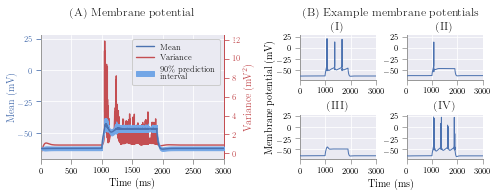

In [18]:
import matplotlib.gridspec as gridspec

interneuron = un.Data("data/interneuron.h5")

time = interneuron["NeuronModel"].time
evaluations = interneuron["NeuronModel"].evaluations
percentile_95 = interneuron["NeuronModel"].percentile_95
percentile_5 = interneuron["NeuronModel"].percentile_5
variance = interneuron["NeuronModel"].variance
mean = interneuron["NeuronModel"].mean

labels = interneuron.get_labels("NeuronModel")
xlabel, ylabel = labels

titlepad = 20

fig = plt.figure(figsize=figsize)
outer = gridspec.GridSpec(1, 2, wspace=0.6)

inner = gridspec.GridSpecFromSubplotSpec(1, 1,
                                         subplot_spec=outer[0])


set_latex_font()
plt.rcParams.update({"axes.titlepad": titlepad})

ax = plt.subplot(inner[0])

variance_ax = ax

set_style("seaborn-darkgrid")

colors = get_colormap(palette="deep", nr_colors=4)


yticks = [-50, -25, 0, 25]
xticks = [0, 1000, 2000, 3000]

title = r"(A) Membrane potential"


ax2 = ax.twinx()
ax2.grid(False)

ax2.plot(time, mean,
         color=colors[0],
         linewidth=linewidth)

# Plotting prediction interval
ax2.fill_between(time,
                 percentile_5,
                 percentile_95,
                 color=(0.45, 0.65, 0.9))


spines_color(ax2, edges={"top": "None", "right": "None", "bottom": "None", "left": "None"})
ax2.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=fontsize)
ax2.patch.set_visible(False) 


# Grid and left axis
ax3 = plt.Subplot(fig, inner[0], zorder=-10)
fig.add_subplot(ax3)

ax3.spines["left"].set_visible(True)
ax3.spines["left"].set_edgecolor(colors[0])
ax3.set_xlabel(xlabel, labelpad=4, fontsize=labelsize, color="black") 
ax3.set_ylabel("Mean (mV)", fontsize=labelsize, labelpad=0, color=colors[0])
ax3.tick_params(axis="y", which="both", right="off", left="on", labelleft="on",
                color=colors[0], labelcolor=colors[0], labelsize=fontsize)

ax3.tick_params(axis="x", which="both", labelcolor="black",labelsize=labelsize)
ax2.set_ylim([min(percentile_5), max(percentile_95) + 2])
ax3.set_ylim([min(percentile_5), max(percentile_95) + 2])

ax2.set_yticks(yticks)
ax3.set_yticks(yticks)

ax3.tick_params(axis="x", labelsize=fontsize)

# Variance
ax.plot(time, variance, color=colors[2], linewidth=linewidth)
ax.grid(False)

ax.spines["right"].set_visible(True)
ax.spines["right"].set_edgecolor(colors[2])
ax.tick_params(axis="y", which="both", right="on", left="off", labelright="on", labelleft="off",
               color=colors[2], labelcolor=colors[2], labelsize=fontsize)
ax.patch.set_visible(False) 
ax.tick_params(axis="x",  labelbottom="off", labelsize=fontsize)

ax2.set_ylabel(r"Variance ($\mathrm{mV}^2$)", color=colors[2], fontsize=labelsize, labelpad=-5)
    

# Dummy plot to create a label
ax2.plot([-10], [10], zorder=-11, color=colors[2], linewidth=linewidth)
ax2.legend(["Mean", "Variance", "90\% prediction\ninterval"], fontsize=fontsize)


ax.set_title(title, fontsize=titlesize)
ax.set_xlim([min(time), max(time)])
ax2.set_xlim([min(time), max(time)])
ax3.set_xlim([min(time), max(time)])



inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                         subplot_spec=outer[1],
                                         hspace=0.8,
                                         wspace=0.4)

set_style("seaborn-white")

plt.rcParams.update({"axes.titlepad": titlepad})

ax = plt.subplot(outer[1], zorder=-10)

spines_color(ax, edges={"top": "None", "bottom": "None",
                        "right": "None", "left": "None"})
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
ax.set_xlabel(xlabel, fontsize=labelsize, labelpad=20) 
ax.set_ylabel(ylabel, fontsize=labelsize, labelpad=25)
ax.set_title("(B) Example membrane potentials", fontsize=titlesize)
fig.add_subplot(ax, zorder=-10)


nr_colors = 4
palette = "deep"

indices = [653, 12, 342, 697]
titles = ["(I)", "(II)", "(III)", "(IV)"]

set_style("seaborn-darkgrid")
for i in range(len(indices)): 
    plt.rcParams.update({"axes.titlepad": 6})
    ax = plt.Subplot(fig, inner[i])
    prettyPlot(time, evaluations[indices[i]],
               ax=ax,
               color=0,
               palette=palette,
               nr_colors=nr_colors,
               linewidth=1)
    
    ax.tick_params(axis="both", which="both", labelsize=fontsize)
    ax.set_title(titles[i], fontsize=titlesize)
    ax.set_yticks(yticks)
    ax.set_xticks(xticks)
    #ax.annotate(titles[i], xy=(0, 0), xytext=(0.85, 0.8), fontsize=titlesize, textcoords="axes fraction", horizontalalignment="center")
    fig.add_subplot(ax)


ymax = []
ymin = []

for i in range(len(indices)):
     ymax.append(max(evaluations[indices[i]]))
     ymin.append(min(evaluations[indices[i]]))

ymax = max(ymax) + 5
ymin = min(ymin) - 5 

axes = fig.get_axes()
for ax in axes:
    if ax != variance_ax:
        ax.set_ylim([ymin, ymax])
        ax.set_xlim([min(time), max(time)])
        
    
outer.tight_layout(fig)
#plt.subplots_adjust(bottom=0.11, top=0.85, left=0.07, right=0.98)
plt.savefig("figures/lgn_confidence_result.eps")
plt.show()

## Normalized sum of first-order sobol indices

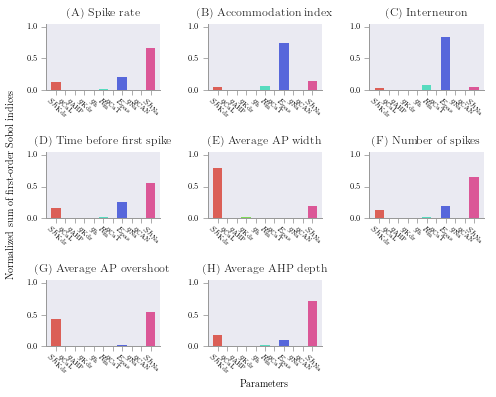

In [27]:
import string

interneuron = un.Data("data/interneuron.h5")

time = interneuron["NeuronModel"].time
sensitivity = interneuron["NeuronModel"].sobol_first_sum

labels = interneuron.get_labels("NeuronModel")
xlabel, ylabel = labels


features = interneuron.keys()

nr_plots = len(features)
grid_size = np.ceil(np.sqrt(nr_plots))
grid_x_size = int(grid_size)
grid_y_size = int(np.ceil(nr_plots/float(grid_x_size)))

set_latex_font()

set_style("seaborn-dark")

set_latex_font()
plt.rcParams.update({"axes.titlepad": 8})
fig, axes = plt.subplots(nrows=grid_y_size, ncols=grid_x_size, squeeze=False, sharex='col', sharey='row',
                         figsize=(figure_width, figure_width*0.8))

labels = interneuron.get_labels("NeuronModel")
xlabel, ylabel = labels

# Add a larger subplot to use to set a common xlabel and ylabel
set_style("seaborn-white")
ax = fig.add_subplot(111, zorder=-10)
spines_color(ax, edges={"top": "None", "bottom": "None",
                        "right": "None", "left": "None"})
ax.tick_params(top='off', bottom='off', left='off', right='off', labelsize=fontsize,
               labelbottom=False, labelleft=False)
ax.set_xlabel("Parameters", labelpad=35, fontsize=labelsize)
ax.set_ylabel('Normalized sum of first-order Sobol indices', labelpad=30, fontsize=labelsize) 


width = 0.2
index = np.arange(1, len(interneuron.uncertain_parameters)+1)*width


latex_labels = {"Epas": "$E_{\\mathrm{pas}}$",
                "cap": "$C_{\\mathrm{m}}$",
                "Rm": "$R_\\mathrm{m}$",
                "gna": "$g_{\\mathrm{Na}}$",
                "nash": "$Sh_\\mathrm{Na}$",
                "gkdr": "$g_{\\mathrm{Kdr}}$",
                "kdrsh": "$Sh_{\\mathrm{Kdr}}$",
                "gahp": "$g_{\\mathrm{AHP}}$",
                "gcat": "$g_{\\mathrm{CaT}}$",
                "gcal": "$g_{\\mathrm{CaL}}$",
                "ghbar": "$g_{\\mathrm{h}}$",
                "gcanbar": "$g_{\\mathrm{CAN}}$"
}

xlabels = []
for label in list_to_latex(interneuron.uncertain_parameters):
    xlabels.append(latex_labels[label])


    
for i in range(0, grid_x_size*grid_y_size):
    nx = i % grid_x_size
    ny = int(np.floor(i/float(grid_x_size)))

    ax = axes[ny][nx]

    if i < nr_plots:      
        if features[i] == "NeuronModel":
            title = "Interneuron"
        elif features[i] == "nr_spikes":
            title = "Number of spikes"
        else:
            title = features[i].replace("_", " ")
            title = title[0].upper() + title[1:]

        
        
        prettyBar(interneuron[features[i]].sobol_first_sum,
                  xlabels=xlabels,
                  nr_colors=len(interneuron.uncertain_parameters),
                  index=index,
                  ax=ax,
                  palette="hls")
        #ax.set_xlabels(xlabels)

        for tick in ax.get_xticklabels():
            tick.set_rotation(-40)

        ax.set_ylim([0, 1.05])
        ax.set_title("({}) ".format(string.ascii_uppercase[i]) + title, fontsize=titlesize)
        #ax.set_xticklabels(xlabels, fontsize=labelsize)
        ax.tick_params(labelsize=fontsize)
    else:
        ax.axis("off")

plt.tight_layout()
plt.subplots_adjust(bottom=0.13, left=0.1)
plt.savefig("figures/lgn_sensitivity.eps")
plt.show()

# Brunel plots

In [10]:
def get_spiketrains(data):
    evaluations = []
    for evaluation in data["brunel_network"].evaluations:
        spiketrains = []
        for spiketrain in evaluation:
            spiketrains.append(data["brunel_network"].time[spiketrain == 1])
            
        evaluations.append(spiketrains)
    
    return evaluations

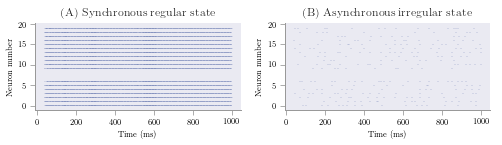

In [11]:
AI = un.Data("data/brunel_AI.h5")
SR = un.Data("data/brunel_SR.h5")

time = AI["brunel_network"].time

evaluations_AI = get_spiketrains(AI)
evaluations_SR = get_spiketrains(SR)

labels = AI.get_labels("brunel_network")
xlabel, ylabel, zlabel = labels


set_style("seaborn-dark")
set_latex_font()
fig, axes = plt.subplots(ncols=2, figsize=(figure_width, figure_width*0.3))



colormap = get_colormap(palette="dark", nr_colors=6)

    
# Synchronous regular state
axes[0].eventplot(evaluations_SR[3], linewidths=0.2, color=colormap[0], linelengths=0.2)
axes[0].tick_params(axis="both", which="both", labelsize=fontsize)
axes[0].set_title("(A) Synchronous regular state", fontsize=titlesize)
axes[0].set_ylabel("Neuron number", fontsize=fontsize)
axes[0].set_xlabel(xlabel, fontsize=fontsize)
axes[0].tick_params(axis="x", which="both", labelcolor="black", labelsize=fontsize)
axes[0].tick_params(axis="y", which="both", labelcolor="black", labelsize=fontsize)
#axes[0].set_xlim([time[0], time[-1]])
#axes[0].set_ylim([0, 19])

# Asynchronous irregular state
axes[1].eventplot(evaluations_AI[3], linewidths=0.2, color=colormap[0], linelengths=0.2)
axes[1].tick_params(axis="both", which="both", labelsize=fontsize)
axes[1].set_title("(B) Asynchronous irregular state", fontsize=titlesize)
axes[1].set_ylabel("Neuron number", fontsize=fontsize)
axes[1].set_xlabel(xlabel, fontsize=fontsize)
axes[1].tick_params(axis="x", which="both", labelcolor="black", labelsize=fontsize)
axes[1].tick_params(axis="y", which="both", labelcolor="black", labelsize=fontsize)
#axes[1].set_xlim([time[0], time[-1]])
#axes[1].set_ylim([0, 19])

plt.tight_layout()
plt.savefig("figures/brunel_results.eps")
plt.show()

## Correlation coefficient

In [12]:
def plot_2d(fig, ax, title, data, feature, attribute, unit=None):
    labels = data.get_labels(feature)
    xlabel, ylabel, zlabel = labels

    ax.set_title(title, fontsize=titlesize)
 

    iax = ax.imshow(data[feature][attribute], cmap="viridis", aspect="equal")
    
    if unit:
        zlabel = unit
        
    cbar = fig.colorbar(iax, ax=ax)
    
    yticks = [0, 5, 10, 15]
    #axes_obj = plt.getp(iax,'axes')
    #plt.setp(plt.getp(axes_obj, 'xticklabels'), color="black")
    cbar.ax.yaxis.set_tick_params(labelcolor='black')
    ax.tick_params(axis="x", which="both", labelcolor="black", labelsize=fontsize)
    ax.set_yticks(yticks)
    ax.tick_params(axis="y", which="both", labelcolor="black", labelsize=fontsize)
    ax.set_xticks(yticks)
    
    #cbar.ax.set_title(zlabel)
    cbar.ax.tick_params(labelsize=fontsize)
    cbar.ax.set_ylabel(zlabel, labelpad=6, fontsize=labelsize)
    ax.set_xlabel(xlabel, fontsize=labelsize)
    ax.set_ylabel(ylabel, fontsize=labelsize)

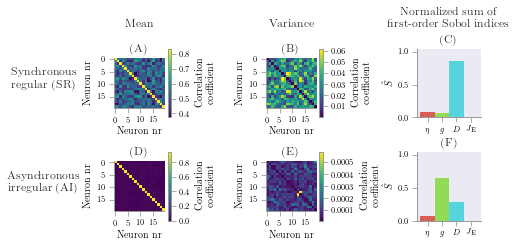

In [13]:
AI = un.Data("data/brunel_AI.h5")
SR = un.Data("data/brunel_SR.h5")

sensitivity_SR = SR["corrcoef"].sobol_first_sum
sensitivity_AI = AI["corrcoef"].sobol_first_sum

plt.rcParams.update({"axes.titlepad": 6})
set_latex_font()

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(figure_width, figure_width*0.5))
plot_2d(fig, axes[0, 0], "(A)", SR, "corrcoef", "mean", unit="Correlation\ncoefficient") 
plot_2d(fig, axes[0, 1], "(B)", SR, "corrcoef", "variance",  unit="Correlation\ncoefficient")
plot_2d(fig, axes[1, 0], "(D)", AI, "corrcoef", "mean", unit="Correlation\ncoefficient")
plot_2d(fig, axes[1, 1], "(E)", AI, "corrcoef", "variance", unit="Correlation\ncoefficient")

        
aspect = np.abs(np.diff(axes[0, 0].get_xlim())[0] / np.diff(axes[0, 0].get_ylim())[0])
    
xlabels = ["$\\eta$", "$g$", "$D$", "$J_\\mathrm{E}$"]

width = 0.2
index = np.arange(1, len(SR.uncertain_parameters)+1)*width


prettyBar(sensitivity_SR,
          xlabels=xlabels,
          nr_colors=len(SR.uncertain_parameters),
          index=index,
          ax=axes[0, 2],
          palette="hls",
          style="seaborn-dark")

axes[0, 2].set_title("(C)", fontsize=titlesize)
axes[0, 2].set_ylabel(r"$\hat{S}$", fontsize=labelsize)
axes[0, 2].tick_params(labelsize=fontsize)
axes[0, 2].set_ylim([0, 1.05])

prettyBar(sensitivity_AI,
          xlabels=xlabels,
          nr_colors=len(SR.uncertain_parameters),
          index=index,
          ax=axes[1, 2],
          palette="hls",
          style="seaborn-dark")

axes[1, 2].set_title("(F)", fontsize=titlesize)
axes[1, 2].set_ylabel(r"$\hat{S}$", fontsize=labelsize)
axes[1, 2].tick_params(labelsize=fontsize)
axes[1, 2].set_ylim([0, 1.05])     

    
#plt.tight_layout()

#axes[0, 0].annotate("SI", xy=(0, 0), xytext=(-0.75, 0.5), fontsize=titlesize, textcoords="axes fraction")
#axes[1, 0].annotate("AI", xy=(0, 0), xytext=(-0.75, 0.5), fontsize=titlesize, textcoords="axes fraction")

axes[0, 0].annotate("Synchronous\nregular (SR)",
                    xy=(0, 0), xytext=(-1.4, 0.4),
                    fontsize=titlesize,
                    textcoords="axes fraction",
                    horizontalalignment="center")
axes[1, 0].annotate("Asynchronous\nirregular (AI)",
                    xy=(0, 0), xytext=(-1.4, 0.4),
                    fontsize=titlesize,
                    textcoords="axes fraction",
                    horizontalalignment="center")


axes[0, 0].annotate("Mean", xy=(0, 0), xytext=(0.5, 1.6), fontsize=titlesize, textcoords="axes fraction", horizontalalignment="center")
axes[0, 1].annotate("Variance", xy=(0, 0), xytext=(0.5, 1.6), fontsize=titlesize, textcoords="axes fraction", horizontalalignment="center")
axes[0, 1].annotate("Normalized sum of\nfirst-order Sobol indices", xy=(0, 0), xytext=(3.6, 1.6), fontsize=titlesize, textcoords="axes fraction", horizontalalignment="center")

plt.subplots_adjust(top=0.8, left=0.22, right=0.94, wspace=1.4, hspace=0.5)
#plt.tight_layout()
plt.savefig("figures/brunel_corrcoef.eps")
plt.show()

## Mean interspike interval

In [14]:
def plot_0d(ax, data, feature, title):
    
    width = 0.2
    distance = 0.5

    check_labels = ['eta', 'g', 'delay', 'J_E']
    xlabels = ["Mean", "Var.", "$P_5$", "$P_{95}$", "$\\eta$",
               "$g$", "$D$", "$J_\\mathrm{E}$"]
    xticks = [0, width, distance + width, distance + 2*width]

    values = [data[feature].mean, data[feature].variance,
              data[feature].percentile_5, data[feature].percentile_95]

    ylabel = data.get_labels(feature)[0]

    prettyBar(values,
              ax=ax,
              index=xticks,
              xlabels=xlabels,
              palette=get_colormap_tableu20())
    
    ax.set_title(title, fontsize=titlesize)
    ax.set_ylabel(ylabel, fontsize=labelsize, labelpad=5)
    ax.tick_params(axis="both", labelsize=fontsize)

    pos = 2*distance + 2*width

    ax2 = ax.twinx()

    spines_color(ax2, edges={"top": "None", "bottom": "None",
                             "right": axis_grey, "left": "None"})
    ax2.tick_params(axis="y", which="both", right="on", left="off", labelright="on",
                    color=axis_grey, labelcolor="black", labelsize=fontsize)
    ax2.set_ylabel('First-order Sobol indices', fontsize=labelsize, labelpad=8)
    ax2.set_ylim([0, 1.05])
        

    i = 0
    legend_bars = []
    colors = get_colormap_tableu20()
    
    for parameter in data.uncertain_parameters:
        if parameter != check_labels[i]:
            raise RuntimeError("Parameters do not correspond to correct label")
            
        l = ax2.bar(pos, data[feature].sobol_first[i], width=width,
                    align='center', color=colors[4+i], linewidth=0)
        
    
        i += 1
        xticks.append(pos)
        pos += width
 
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels, fontsize=labelsize)
    
    
    
    ax.annotate("First-order Sobol index\nfor each parameter", 
                xy=(0, 0), xytext=(0.8, -0.32), fontsize=labelsize,
                textcoords="axes fraction", horizontalalignment="center")
    
    for tick in ax.get_xticklabels()[:2]:
        tick.set_rotation(-35)

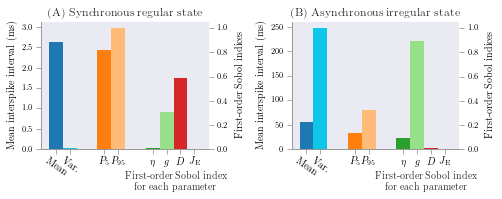

In [15]:
SR = un.Data("data/brunel_SR.h5")
AI = un.Data("data/brunel_AI.h5")

set_latex_font()
set_style("seaborn-dark")
plt.rcParams.update({"axes.titlepad": 6,"axes.spines.right": True})

fig, axes = plt.subplots(ncols=2, sharey=False,  figsize=figsize)

plot_0d(axes[0], SR, "mean_isi", "(A) Synchronous regular state")
plot_0d(axes[1], AI, "mean_isi", "(B) Asynchronous irregular state")


plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("figures/brunel_isi.eps")
plt.show()